In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('covid.csv')

In [3]:
data.head()

,Province,Lon,Lan,Plot_id,Cases,Population,GDP,Distance,PassengerTurnover,TravelConnection
0,Anhui,117.283043,31.861191,34,990,6324,37114,457,786.38,0.0253
1,Beijing,116.405289,39.904987,11,429,2154,35371,1171,154.57,0.0130
2,Chongqing,106.504959,29.533155,50,576,3102,23605,1078,227.09,0.0154
3,Fujian,119.306236,26.075302,35,296,3941,42395,924,385.20,0.0100
4,Gansu,103.834170,36.061380,62,124,2637,8718,1446,401.28,0.0041


In [4]:
data['Cases'] = data['Cases'].astype('float')
data['Plot_id'] = data['Plot_id'].astype('str')

In [5]:
import folium
from folium.features import DivIcon
import geojson

with open('china.json', 'rb') as f:
    districts = geojson.load(f)

m = folium.Map(
    location=[39.30029918615029, 103.88671875],
    zoom_start=4
)

folium.Choropleth(
    geo_data=districts,
    name='choropleth',
    data=data,
    columns=['Plot_id', 'Cases'],
    key_on='properties.id', 
    fill_color='YlGn', 
    fill_opacity=0.5, 
    line_opacity=0.2,  
    legend_name='Number of Cases').add_to(m)

for i in range(0,len(data)):
    if i != 13:
        folium.map.Marker(
            [data.iloc[i]['Lan'], data.iloc[i]['Lon']],
            icon=DivIcon(
                icon_size=(20,15),
                icon_anchor=(10,7.5),
                html='<div style="font-size: 12pt; color:black">%s</div>' % data.iloc[i]['Cases'].astype('int'))
        ).add_to(m)
    else:
        folium.map.Marker(
            [data.iloc[i]['Lan']+0.7, data.iloc[i]['Lon']+0.1],
            icon=DivIcon(
                icon_size=(20,15),
                icon_anchor=(10,7.5),
                html='<div style="font-size: 12pt; color:black">%s</div>' % data.iloc[i]['Cases'].astype('int'))
        ).add_to(m)

m

In [6]:
data.iloc[:,4:].corr()

,Cases,Population,GDP,Distance,PassengerTurnover,TravelConnection
Cases,1.000000,0.670640,0.694976,-0.589030,0.682056,0.784423
Population,0.670640,1.000000,0.842882,-0.501326,0.859728,0.647999
GDP,0.694976,0.842882,1.000000,-0.507243,0.688214,0.494538
Distance,-0.589030,-0.501326,-0.507243,1.000000,-0.574257,-0.586913
PassengerTurnover,0.682056,0.859728,0.688214,-0.574257,1.000000,0.712156
TravelConnection,0.784423,0.647999,0.494538,-0.586913,0.712156,1.000000


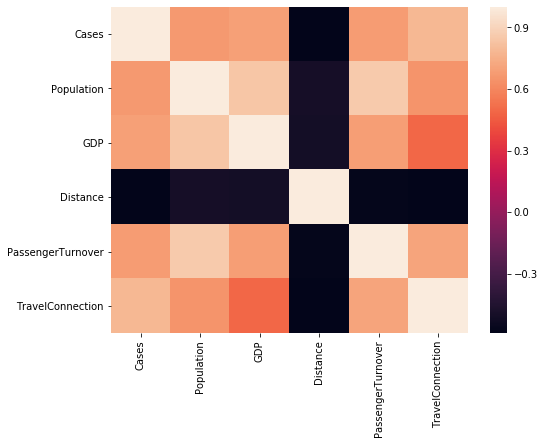

In [7]:
plt.figure(figsize=(8,6),dpi=72)
sns.heatmap(data.iloc[:,4:].corr())